In [293]:
import numpy as np
import pandas as pd

In [294]:
df = pd.read_csv("./Dataset/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [296]:
df.duplicated().sum()

np.int64(0)

In [297]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [298]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [299]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [300]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True) # removing unuseful columns

In [301]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [302]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True) # change categorical values to numerical

In [303]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [304]:
df[['Geography_Germany', 'Geography_Spain',	'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain',	'Gender_Male']].astype(int) #change the dtypes to int
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [305]:
# Determine input and output columns
X = df.drop(columns=['Exited'])
y = df['Exited']

In [306]:
print(X.shape, y.shape)

(10000, 11) (10000,)


In [307]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [308]:
X_train.shape

(8000, 11)

In [309]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [310]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [311]:
X_train_scaled

array([[ 0.04340158, -0.9465415 , -0.34836182, ..., -0.57715782,
        -0.57754272,  0.90339252],
       [ 1.00848656,  0.10318316, -0.69357359, ..., -0.57715782,
        -0.57754272, -1.10693854],
       [ 0.6037735 , -0.56482344, -0.69357359, ..., -0.57715782,
         1.73147365,  0.90339252],
       ...,
       [ 1.79715815,  0.48490122, -1.38399712, ..., -0.57715782,
        -0.57754272, -1.10693854],
       [-0.89055162,  0.19861268,  1.37769701, ...,  1.73262835,
        -0.57754272,  0.90339252],
       [-1.23300113,  0.58033074, -1.38399712, ..., -0.57715782,
         1.73147365, -1.10693854]], shape=(8000, 11))

In [312]:
# Artificial Neural Network Parts
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [313]:
model = Sequential() # There are two types of model in tf: Sequential & Non-sequential
model.add(Dense(11, activation='relu', input_dim=11)) # create a demse layer with 3 nodes/perceptron with sigmoid as activation func.
# We can also use relu, which is better in most case. Since this is a hidden layer, its input_dim are 11, the data we have.
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output layer

C:\Users\12368\OneDrive\Desktop\DeepLearning\tfvenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [314]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [315]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [316]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7781 - loss: 0.5548 - val_accuracy: 0.7956 - val_loss: 0.4844
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7958 - loss: 0.4605 - val_accuracy: 0.7956 - val_loss: 0.4475
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7970 - loss: 0.4395 - val_accuracy: 0.8031 - val_loss: 0.4323
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8117 - loss: 0.4300 - val_accuracy: 0.8181 - val_loss: 0.4247
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8203 - loss: 0.4233 - val_accuracy: 0.8219 - val_loss: 0.4166
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8236 - loss: 0.4165 - val_accuracy: 0.8306 - val_loss: 0.4087
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8306 - loss: 0.4093 - val_accuracy: 0.8350 - val_loss: 0.4015
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4009 - val_accu

In [317]:
model.layers[0].get_weights()

[array([[-1.24455452e-01,  4.71684158e-01,  8.40293765e-02,
         -1.07437655e-01, -5.23708835e-02, -2.66110927e-01,
         -2.49788642e-01,  1.97774678e-01, -1.51040891e-04,
         -6.55314326e-02,  2.17172891e-01],
        [-9.17294502e-01, -1.54613391e-01, -4.72579807e-01,
         -7.35888720e-01,  2.86408931e-01,  1.01867390e+00,
          4.37043875e-01, -1.02667689e+00, -7.40754485e-01,
          2.72959411e-01,  1.13211787e+00],
        [ 2.50777248e-02,  5.15675962e-01, -1.11327834e-01,
         -1.16844222e-01,  3.34423385e-03, -2.50913184e-02,
          1.97634414e-01,  7.41528496e-02,  4.83472943e-02,
          4.82474267e-02,  2.21231952e-01],
        [-1.49475142e-01, -2.61437267e-01,  7.44264543e-01,
         -5.70777893e-01, -2.56952625e-02,  1.08383775e+00,
          4.46541488e-01,  3.55167910e-02,  6.63314760e-01,
          4.05129671e-01, -7.84188390e-01],
        [-1.83855101e-01,  6.04687631e-01, -4.50216919e-01,
          5.49806535e-01, -1.19849527e+00,  

In [318]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.00486695],
       [0.12156484],
       [0.05048991],
       ...,
       [0.01833809],
       [0.16862772],
       [0.19861893]], shape=(2000, 1), dtype=float32)

In [319]:
# The outputs are in probabilities since we are using sigmoid function as activation function. We need to set a threshold if we want binary values
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


In [320]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(2000, 1))

In [321]:
count_ones = np.sum(y_pred == 1)
count_zeros = np.sum(y_pred == 0)
print(f"Total # of customers that left the banking service: {count_ones}\nTotal # of customers that still use the banking service: {count_zeros}")

Total # of customers that left the banking service: 279
Total # of customers that still use the banking service: 1721


In [322]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.859

In [323]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.778124988079071,
  0.7957812547683716,
  0.7970312237739563,
  0.811718761920929,
  0.8203125,
  0.8235937356948853,
  0.8306249976158142,
  0.8353124856948853,
  0.8409374952316284,
  0.8459374904632568,
  0.8512499928474426,
  0.8528125286102295,
  0.8551562428474426,
  0.8571875095367432,
  0.856249988079071,
  0.8567187786102295,
  0.8582812547683716,
  0.8592187762260437,
  0.8598437309265137,
  0.8600000143051147,
  0.8598437309265137,
  0.8618749976158142,
  0.8600000143051147,
  0.8606250286102295,
  0.8606250286102295,
  0.8603125214576721,
  0.8598437309265137,
  0.8607812523841858,
  0.8609374761581421,
  0.8628125190734863,
  0.860156238079071,
  0.8618749976158142,
  0.8621875047683716,
  0.862500011920929,
  0.86328125,
  0.8620312213897705,
  0.8639062643051147,
  0.8615624904632568,
  0.8621875047683716,
  0.8610937595367432,
  0.864062488079071,
  0.8617187738418579,
  0.8642187714576721,
  0.8614062666893005,
  0.862500011920929,
  0.8635937571525574,


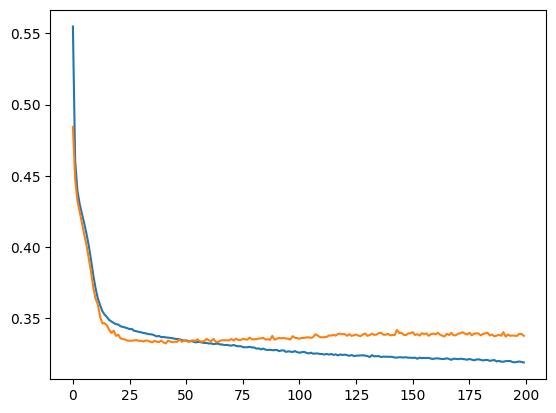

In [324]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

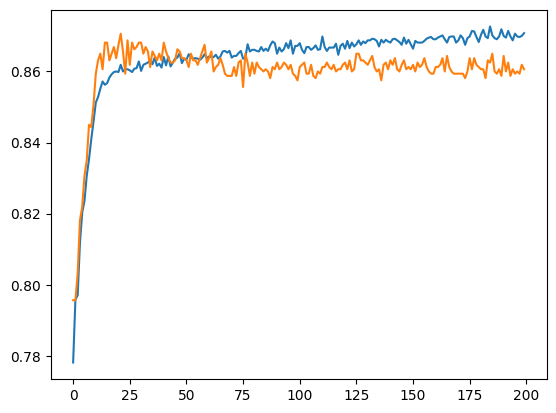

In [325]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])